In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE, RandomOverSampler
from sklearn.preprocessing import LabelEncoder,StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_1= pd.read_csv("C:\\Users\\Ahmed Mohamed\\Documents\\vs code\\Model\\DataSet\\Toddler Autism dataset July 2018.csv")
df_2 = pd.read_csv("C:\\Users\\Ahmed Mohamed\\Documents\\vs code\\Model\\DataSet\\autism_screening.csv")
df_3 = pd.read_csv("C:\\Users\\Ahmed Mohamed\\Documents\\vs code\\Model\\DataSet\\data_csv.csv")
df_4 = pd.read_csv("C:\\Users\\Ahmed Mohamed\\Documents\\vs code\\Model\\DataSet\\Autism Spectrum Disorder Screening Data for Toddlers in Saudi Arabia Data Set.csv")
df_5 = pd.read_csv("C:\\Users\\Ahmed Mohamed\\Documents\\vs code\\Model\\DataSet\\autism_dataset (1).csv")

In [ ]:
import pandas as pd

# download the files from the given links and save them in the specified directory
df_files = {
    "df_1": r"C:\Users\Ahmed Mohamed\Documents\vs code\Model\DataSet\Toddler Autism dataset July 2018.csv",
    "df_2": r"C:\Users\Ahmed Mohamed\Documents\vs code\Model\DataSet\autism_screening.csv",
    "df_3": r"C:\Users\Ahmed Mohamed\Documents\vs code\Model\DataSet\data_csv.csv",
    "df_4": r"C:\Users\Ahmed Mohamed\Documents\vs code\Model\DataSet\Autism Spectrum Disorder Screening Data for Toddlers in Saudi Arabia Data Set.csv",
    "df_5": r"C:\Users\Ahmed Mohamed\Documents\vs code\Model\DataSet\autism_dataset (1).csv"
}

# read the files and print their columns
dfs = {}
for name, file in df_files.items():
    try:
        dfs[name] = pd.read_csv(file)
        print(f"\n{name} ({file}):")
        print(dfs[name].columns.tolist())
        print("-" * 80)
    except Exception as e:
        print(f"{name} ({file}): {e}")

# till 3 year Toddler Autism dataset July 2018.csv: Case_No, Qchat-10-Score, Ethnicity
# till 55 year autism_screening.csv: result, age_desc, ethnicity, contry_of_res
# till 18 year data_csv.csv: CASE_NO_PATIENT'S, Qchat_10_Score, Ethnicity
# till 3 year Saudi Arabia Data Set.csv: Screening Score, Region
# autism_dataset (1).csv: ID, ethnicity, contry_of_res, result, age_desc

# in Who is completing the test make 2 features (self and other)
# Toddler Autism dataset July 2018.csv: Case_No, Qchat-10-Score, Ethnicity
# autism_screening.csv: result, age_desc, ethnicity, contry_of_res
# data_csv.csv: CASE_NO_PATIENT'S, Qchat_10_Score, Ethnicity
# Saudi Arabia Data Set.csv: Screening Score, Region
# autism_dataset (1).csv: ID, ethnicity, contry_of_res, result, age_desc


🔹 أسماء الأعمدة في الملف df_1 (C:\Users\Ahmed Mohamed\Documents\vs code\Model\DataSet\Toddler Autism dataset July 2018.csv):
['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'age', 'gender', 'family_mem_with_ASD', 'who_completed_the_test', 'class']
--------------------------------------------------------------------------------

🔹 أسماء الأعمدة في الملف df_2 (C:\Users\Ahmed Mohamed\Documents\vs code\Model\DataSet\autism_screening.csv):
['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'age', 'gender', 'family_mem_with_ASD', 'used_app_before', 'who_completed_the_test', 'class']
--------------------------------------------------------------------------------

🔹 أسماء الأعمدة في الملف df_3 (C:\Users\Ahmed Mohamed\Documents\vs code\Model\DataSet\data_csv.csv):
['A1', 'A2', 'A3', 'A4', 'A5', 'A6', 'A7', 'A8', 'A9', 'A10', 'Social_Responsiveness_Scale', 'age', 'Speech Delay/Language Disorder', 'Learning disorder', 'Genetic_Disorders', 'Depression', 'Global developme

In [ ]:
import pandas as pd

# list of files and their corresponding columns to drop and rename
files_columns = {
    r"C:\Users\Ahmed Mohamed\Documents\vs code\Model\DataSet\Toddler Autism dataset July 2018.csv": 
        {"drop": ["Case_No", "Qchat-10-Score", "Ethnicity", "jaundice"], "rename": {"Age": "age", "Class": "class", "Gender":"gender",
        "Who_completed_the_test":"who_completed_the_test","Family_mem_with_ASD":"family_mem_with_ASD"}},

    r"C:\Users\Ahmed Mohamed\Documents\vs code\Model\DataSet\autism_screening.csv":  
        {"drop": ["result", "age_desc", "ethnicity", "contry_of_res","jundice",'used_app_before'], 
         "rename": {'A1_Score':'A1', 'A2_Score':'A2', 'A3_Score':'A3', 'A4_Score':'A4', 'A5_Score':'A5',
        'A6_Score':'A6', 'A7_Score':'A7', 'A8_Score':'A8', 'A9_Score':'A9', 'A10_Score':'A10',"austim":"family_mem_with_ASD",
        "relation":"who_completed_the_test", "Class/ASD": "class"}},

    r"C:\Users\Ahmed Mohamed\Documents\vs code\Model\DataSet\data_csv.csv": 
        {"drop": ["CASE_NO_PATIENT'S", "Qchat_10_Score", "Ethnicity", "jaundice",
                  "Social_Responsiveness_Scale","Speech Delay/Language Disorder", 
                  "Learning disorder","Genetic_Disorders","Depression","Global developmental delay/intellectual disability",
                  "Social/Behavioural Issues","Childhood Autism Rating Scale","Anxiety_disorder"],
                   
        "rename": {"A10_Autism_Spectrum_Quotient":"A10", "Age_Years":"age","Sex":"gender",
                    "ASD_traits": "class","Who_completed_the_test":"who_completed_the_test","Family_mem_with_ASD":"family_mem_with_ASD"}      
        },

    r"C:\Users\Ahmed Mohamed\Documents\vs code\Model\DataSet\Autism Spectrum Disorder Screening Data for Toddlers in Saudi Arabia Data Set.csv": 
        {"drop": ["Screening Score", "Region"], "rename": {"Age": "age", "Class": "class", "Gender":"gender",
        "Who is completing the test":"who_completed_the_test","Family member with ASD history":"family_mem_with_ASD"}},

    r"C:\Users\Ahmed Mohamed\Documents\vs code\Model\DataSet\autism_dataset (1).csv": 
        {"drop": ["ID", "ethnicity", "contry_of_res", "result", "age_desc","jaundice",'used_app_before'], 
        "rename": {'A1_Score':'A1', 'A2_Score':'A2', 'A3_Score':'A3', 'A4_Score':'A4', 'A5_Score':'A5',
       'A6_Score':'A6', 'A7_Score':'A7', 'A8_Score':'A8', 'A9_Score':'A9', 'A10_Score':'A10',"austim":"family_mem_with_ASD",
       "relation":"who_completed_the_test", "Class/ASD": "class"}}
}

dataframes = []
for file_path, actions in files_columns.items():
    try:
        df = pd.read_csv(file_path)  # dawnload the file
        
        # delete the specified columns
        df.drop(columns=actions["drop"], inplace=True, errors="ignore")  
        
        # rename the specified columns
        if actions["rename"]:
            df.rename(columns=actions["rename"], inplace=True)
        
        # save the modified DataFrame to a new CSV file
        df.to_csv(file_path, index=False)

        # add the modified DataFrame to the list
        dataframes.append(df)  
        
        print(f" {file_path}")
    except Exception as e:
        print(f"{file_path}: {e}")



✅ تمت معالجة الملف: C:\Users\Ahmed Mohamed\Documents\vs code\Model\DataSet\Toddler Autism dataset July 2018.csv
✅ تمت معالجة الملف: C:\Users\Ahmed Mohamed\Documents\vs code\Model\DataSet\autism_screening.csv
✅ تمت معالجة الملف: C:\Users\Ahmed Mohamed\Documents\vs code\Model\DataSet\data_csv.csv
✅ تمت معالجة الملف: C:\Users\Ahmed Mohamed\Documents\vs code\Model\DataSet\Autism Spectrum Disorder Screening Data for Toddlers in Saudi Arabia Data Set.csv
✅ تمت معالجة الملف: C:\Users\Ahmed Mohamed\Documents\vs code\Model\DataSet\autism_dataset (1).csv


In [59]:
# قائمة الملفات المطلوبة
file_paths = [
    r"C:\Users\Ahmed Mohamed\Documents\vs code\Model\DataSet\Autism Spectrum Disorder Screening Data for Toddlers in Saudi Arabia Data Set.csv",
    r"C:\Users\Ahmed Mohamed\Documents\vs code\Model\DataSet\Toddler Autism dataset July 2018.csv"
]
try:
    for file_path in file_paths:
        # تحميل الملف
        df = pd.read_csv(file_path)
        
        # التأكد من وجود عمود العمر
        if "age" in df.columns:
            # تحويل العمر إلى سنوات
            df["age"] = df["age"].astype(float) / 12
        
            # حفظ التعديلات في نفس الملف
            df.to_csv(file_path, index=False)
            print(f"✅ تم تحويل العمر إلى سنوات في الملف: {file_path}")
        else:
            print(f"⚠️ لم يتم العثور على عمود 'age' في الملف: {file_path}")
except Exception as e:
    print(f"⚠️ خطأ أثناء معالجة الملفات: {e}")


✅ تم تحويل العمر إلى سنوات في الملف: C:\Users\Ahmed Mohamed\Documents\vs code\Model\DataSet\Autism Spectrum Disorder Screening Data for Toddlers in Saudi Arabia Data Set.csv
✅ تم تحويل العمر إلى سنوات في الملف: C:\Users\Ahmed Mohamed\Documents\vs code\Model\DataSet\Toddler Autism dataset July 2018.csv


In [61]:
# دمج جميع البيانات في ملف واحد
merged_df = pd.concat(dataframes, ignore_index=True)

# حفظ الملف النهائي
output_path = r"C:\Users\Ahmed Mohamed\Documents\vs code\Model\DataSet\merged_dataset.csv"
merged_df.to_csv(output_path, index=False)

print(f"✅ تم حفظ الملف المدمج في: {output_path}")

✅ تم حفظ الملف المدمج في: C:\Users\Ahmed Mohamed\Documents\vs code\Model\DataSet\merged_dataset.csv


In [67]:
dataFile = r"C:\Users\Ahmed Mohamed\Documents\vs code\Model\DataSet\merged_dataset.csv"
df = pd.read_csv(dataFile)

# عرض معلومات عن البيانات
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5049 entries, 0 to 5048
Data columns (total 15 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   A1                      5049 non-null   int64  
 1   A2                      5049 non-null   int64  
 2   A3                      5049 non-null   int64  
 3   A4                      5049 non-null   int64  
 4   A5                      5049 non-null   int64  
 5   A6                      5049 non-null   int64  
 6   A7                      5049 non-null   int64  
 7   A8                      5049 non-null   int64  
 8   A9                      5049 non-null   int64  
 9   A10                     5049 non-null   int64  
 10  age                     5049 non-null   float64
 11  gender                  5049 non-null   object 
 12  family_mem_with_ASD     5049 non-null   object 
 13  who_completed_the_test  5049 non-null   object 
 14  class                   5049 non-null   

In [68]:
for col in df.columns:
    if df[col].dtypes == "object":
        print(df[col].value_counts())

gender
m         1632
M         1447
f          926
F          538
Female     349
Male       157
Name: count, dtype: int64
family_mem_with_ASD
no     2166
No     1714
Yes     777
yes     392
Name: count, dtype: int64
who_completed_the_test
Health Care Professional    1257
Self                        1239
family member               1018
Family Member                658
Family member                471
?                            135
Other                         93
Parent                        79
Relative                      46
School and NGO                29
Others                        13
Health care professional      11
Name: count, dtype: int64
class
Yes    1802
No     1237
0       804
NO      515
1       502
YES     189
Name: count, dtype: int64


In [ ]:
df['gender'] = df['gender'].replace({'m':1,'M':1,'Male':1,'f':2,'F':2,'Female':2})

df['family_mem_with_ASD'] = df['family_mem_with_ASD'].replace({'No':0,'no':0,'Yes':1,'yes':1})

df['who_completed_the_test'] = df['who_completed_the_test'].replace({
    "Self":1,
    "Health Care Professional":0,
    "Family member":0,
    "Family Member":0,
    "Family member":0,
    "family member":0,
    "?":0,
    "Other":0,
    "Parent":0,
    "Relative":0,
    "School and NGO":0,
    "Others":0,
    "Health care professional":0})

df['class'] = df['class'].replace({'Yes':1,'yes':1,'YES':1,'1':1,'No': 0,'no': 0,'NO':0,'0':0})

for col in df.columns:
    if df[col].dtypes == "object":
        print(df[col].value_counts())

In [87]:
new_file = r"C:\Users\Ahmed Mohamed\Documents\vs code\Model\DataSet\cleaned_dataset.csv"
df.to_csv(new_file, index=False)

print(f"تم حفظ الملف بعد التعديلات في: {new_file}")

تم حفظ الملف بعد التعديلات في: C:\Users\Ahmed Mohamed\Documents\vs code\Model\DataSet\cleaned_dataset.csv


In [86]:
# تحويل الأعمدة النصية إلى أرقام باستخدام Label Encoding
for col in df.columns:
    if df[col].dtypes == "object":
        le = LabelEncoder()  # إنشاء كائن جديد لكل عمود
        df[col] = le.fit_transform(df[col])

# عرض أول 5 صفوف
df.head(12)

,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,age,gender,family_mem_with_ASD,who_completed_the_test,class
0,0,0,0,0,0,0,1,1,0,1,2.333333,2,0,0,0
1,1,1,0,0,0,1,1,0,0,0,3.000000,1,0,0,1
2,1,0,0,0,0,0,1,1,0,1,3.000000,1,0,0,1
3,1,1,1,1,1,1,1,1,1,1,2.000000,1,0,0,1
4,1,1,0,1,1,1,1,1,1,1,1.666667,2,1,0,1
5,1,1,0,0,1,1,1,1,1,1,1.750000,1,0,0,1
6,1,0,0,1,1,1,0,0,1,0,2.750000,1,0,0,1
7,0,1,0,0,1,0,1,1,1,1,2.750000,1,0,0,1
8,0,0,0,0,0,0,1,0,0,1,3.000000,1,0,0,0
9,1,1,1,0,1,1,0,1,1,1,1.833333,1,0,0,1


In [22]:
df['Age'].value_counts()

Age
2.000000    673
1.000000    536
3.000000    498
5.000000    142
4.000000    135
3.200405      1
2.718550      1
4.453294      1
3.675809      1
Name: count, dtype: int64

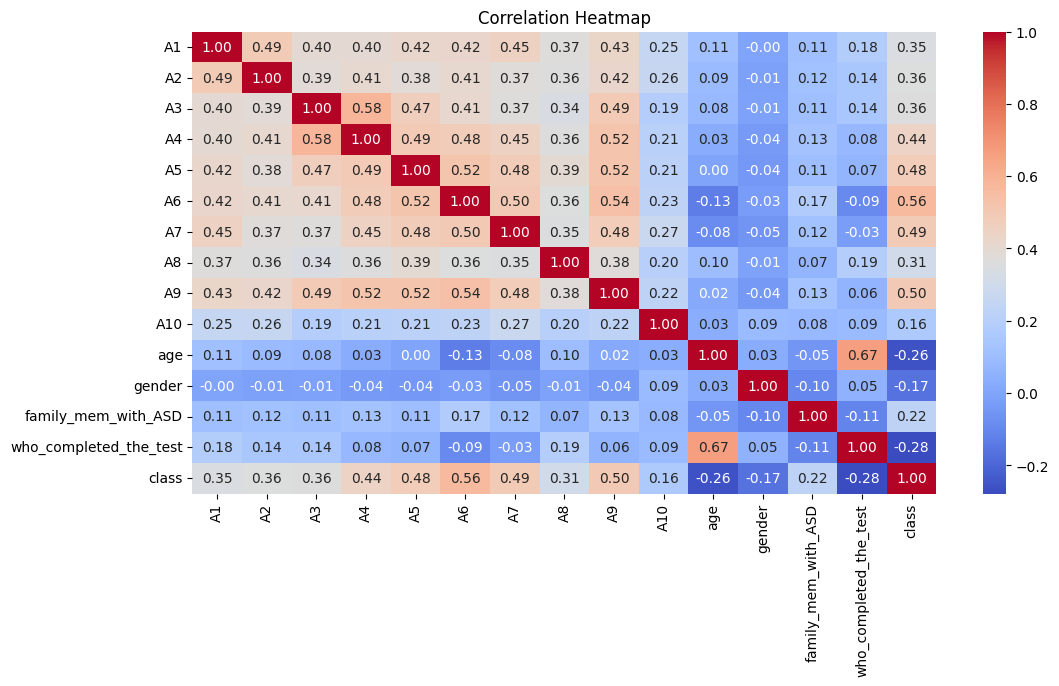

In [109]:
correlation_matrix = df.corr()

# Plot heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', cbar=True)
plt.title('Correlation Heatmap')
plt.show()

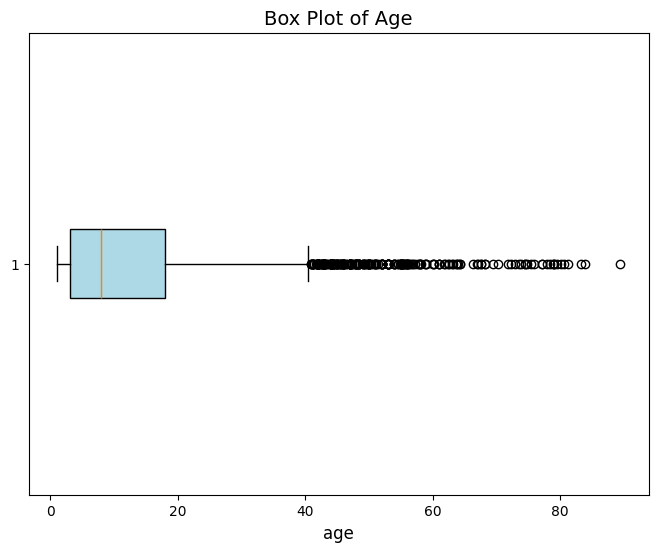

In [95]:
plt.figure(figsize=(8, 6))
plt.boxplot(df['age'], vert=False, patch_artist=True, boxprops=dict(facecolor='lightblue'))
plt.title('Box Plot of Age', fontsize=14)
plt.xlabel('age', fontsize=12)
plt.show()

In [97]:
X = df.drop(columns = "class")
y = df['class']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=7)

Training set size: (3562, 14)



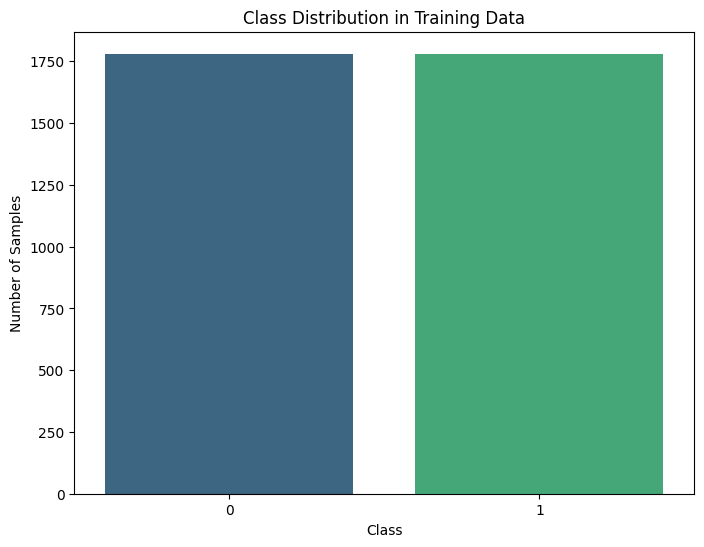

In [108]:
X_train_rov, y_train_rov = augment_data(X_train, y_train, method='randomoversampler')
print(f"Training set size: {X_train_rov.shape}\n")
plot_class_distribution(y_train_rov)

Training set size: (3562, 14)



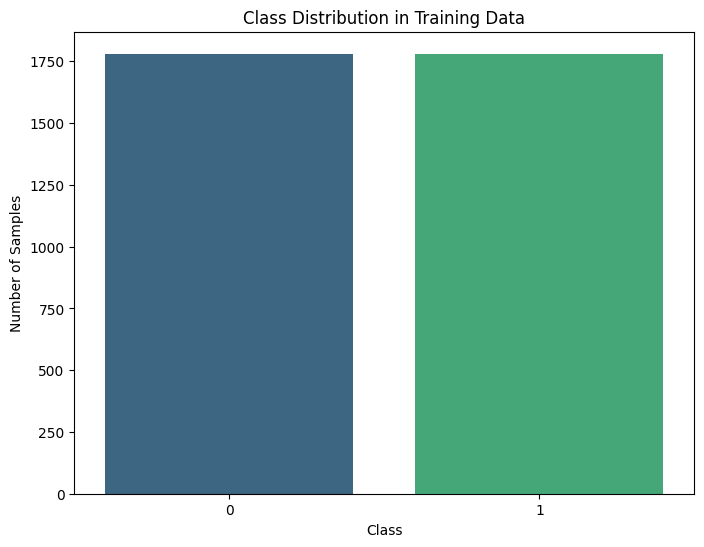

In [107]:
X_train_smote, y_train_smote = augment_data(X_train, y_train, method='smote')

print(f"Training set size: {X_train_smote.shape}\n")
plot_class_distribution(y_train_smote)